In [2]:
import pandas as pd
import glob, os

# Prepare Data
## Load Data
https://www.kaggle.com/lucabasa/dutch-energy

In [3]:
def load_files(path, marker):
    files_all = [f for f in os.listdir(path)]

    year = []
    company = []
    for file in files_all:
        batch = file.replace('.csv', '').split(marker)
        company.append(batch[0].replace('_',''))
        year.append(batch[1].replace('_',''))

    year = pd.to_datetime([i[-4:] for i in year]).year

    dock = []
    for file in zip(files_all, year, company):
        load = pd.read_csv(path+file[0])
        load['company'] = file[2]
        load['year'] = file[1]
        load['net_type'] = marker
        dock.append(load)

    return pd.concat(dock)

In [4]:
raw = load_files('../_input/dutch/Electricity/', 'electricity')

In [5]:
raw.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,company,year,net_type,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.0,coteq,2013,electricity,NaN,NaN,NaN
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86,1x35,1800.0,94.59,0.0,coteq,2013,electricity,NaN,NaN,NaN
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100,1x35,1315.0,100.00,0.0,coteq,2013,electricity,NaN,NaN,NaN
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44,1x35,6379.0,92.00,0.0,coteq,2013,electricity,NaN,NaN,NaN
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36,1x35,4404.0,92.86,0.0,coteq,2013,electricity,NaN,NaN,NaN


In [6]:
df = raw.copy()

## Preview Variables

In [7]:
df.keys()

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'company', 'year', 'net_type', 'ï»¿NETBEHEERDER', 'STANDAARDDEVIATIE',
       '%Defintieve aansl (NRM)'],
      dtype='object')

## Understand the Target

## Create a Test Set

# Explore
## Correlations

## Do 3 Graphs

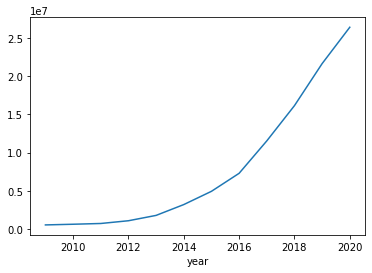

In [8]:
df.groupby(['year'])['smartmeter_perc'].sum().plot();


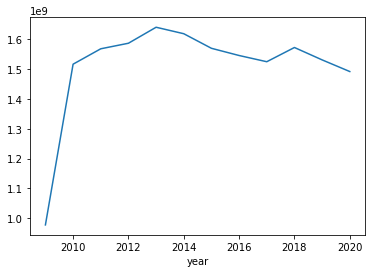

In [9]:
df.groupby(['year'])['annual_consume'].sum().plot();

# Data Cleaning
## Missing Values

# Machine Learning

# Documentation